# HiPerGator-Optimized Grain Size Evolution Analysis

## Scientific Overview

This notebook provides comprehensive analysis of average grain size evolution over time using high-performance computing resources on the University of Florida's HiPerGator supercomputing cluster. The analysis focuses on understanding grain growth kinetics, statistical distributions, and temporal evolution patterns in large-scale polycrystalline systems.

## Research Objectives

- **Grain Growth Kinetics**: Quantitative analysis of grain size evolution and growth law validation
- **Statistical Characterization**: Comprehensive statistical analysis of grain size distributions
- **HiPerGator Performance**: Validation of cluster-optimized computational workflows
- **Temporal Analysis**: Time-dependent grain growth behavior and characteristic time scales

## Key Features

### High-Performance Computing Integration
- **HiPerGator Cluster**: University of Florida supercomputing infrastructure utilization
- **Parallel Processing**: Multi-core optimization for large-scale grain analysis
- **Scalable Workflows**: Efficient processing of extensive simulation datasets
- **Memory Optimization**: Advanced memory management for large grain systems

### Advanced Grain Size Analysis
- **Average Grain Size**: Temporal evolution of mean grain dimensions
- **Growth Law Fitting**: Power-law analysis and kinetic parameter extraction
- **Statistical Moments**: Comprehensive characterization of grain size distributions
- **Comparative Analysis**: Multi-method validation and cross-verification

### Scientific Visualization
- **Publication-Quality Plots**: High-resolution figures with enhanced formatting
- **Statistical Overlays**: Error bars, confidence intervals, and trend analysis
- **Multi-Scale Analysis**: Both linear and logarithmic scaling for comprehensive visualization
- **Interactive Features**: Enhanced plotting capabilities for detailed examination

## Technical Specifications

- **Processing Platform**: HiPerGator 3.0 supercomputing cluster
- **Computational Resources**: Multi-node parallel processing with optimized algorithms
- **Data Handling**: Efficient I/O operations for large-scale simulation outputs
- **Memory Management**: Advanced techniques for processing extensive grain datasets
- **Analysis Tools**: NumPy, SciPy, and Matplotlib with HPC-optimized configurations

## Applications

- **Materials Science**: Understanding grain growth mechanisms in polycrystalline materials
- **Microstructure Evolution**: Quantitative analysis of microstructural changes
- **Computational Validation**: Verification of simulation accuracy and convergence
- **Industrial Applications**: Materials processing optimization and quality control

In [1]:
import os
current_path = os.getcwd()
import numpy as np
from numpy import seterr
seterr(all='raise')
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import sys
sys.path.append(current_path)
sys.path.append(current_path+'/../../')
import myInput
import PACKAGE_MP_Linear as linear2d
sys.path.append(current_path+'/../calculate_tangent/')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


In [8]:
if __name__ == '__main__':
    # File name
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_wellEnergy/results/"
    
    file_name_list = ["p_aveE_2_CosMax1Mobility_delta0.0_J1_refer_1_0_0_seed56689_kt0.66.npy",
                    "p_aveE_2_CosMax1Mobility_delta0.7_J1_refer_1_0_0_seed56689_kt0.66.npy",
                    "p_aveE_2_CosMax1Mobility_delta0.8_J1_refer_1_0_0_seed56689_kt0.66.npy",
                    "p_aveE_2_CosMax1Mobility_delta0.9_J1_refer_1_0_0_seed56689_kt0.66.npy"]
    label_list = ["iso",r"$\sigma$=0.7",r"$\sigma$=0.8",r"$\sigma$=0.9"]
    

In [6]:
    grain_size_array = np.zeros((len(file_name_list),161),dtype='int')
    for i in tqdm(range(len(file_name_list))):
        npy_data = np.load(npy_file_folder+file_name_list[i])
        for j in range(npy_data.shape[0]):
            grain_size_array[i][j] = np.sum(npy_data[j,:].flatten()==2)
        

100%|██████████| 4/4 [00:00<00:00,  8.07it/s]


<Figure size 432x288 with 0 Axes>

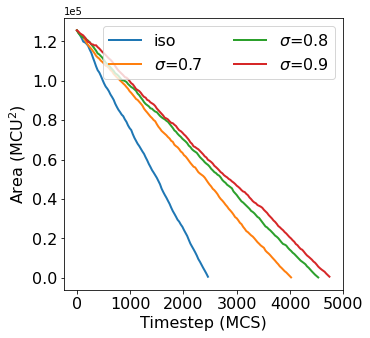

In [15]:
    # Start plotting
    plt.figure()
    fig = plt.figure(figsize=(5, 5))
    for i in range(len(file_name_list)):
        plt.plot(30*np.arange(161)[grain_size_array[i]>0], grain_size_array[i][grain_size_array[i]>0], label=label_list[i], linewidth=2)

    plt.xlabel("Timestep (MCS)", fontsize=16)
    plt.ylabel(r"Area (MCU$^2$)", fontsize=16)
    plt.xticks([0,1000,2000,3000,4000,5000],fontsize=16)
    plt.ticklabel_format(style='sci',scilimits=(-1,2),axis='y')
    plt.legend(fontsize=16, ncol=2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig(current_path + "/figures/circle_grain_area_over_time_mobility.png", dpi=400,bbox_inches='tight')